D:\school\se1_year4\IntSys\tieu_luan\code\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 246s 476ms/step - accuracy: 0.5578 - loss: 0.6727 - val_accuracy: 0.6284 - val_loss: 0.5898
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 169s 338ms/step - accuracy: 0.6572 - loss: 0.5808 - val_accuracy: 0.7965 - val_loss: 0.5952
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 183s 366ms/step - accuracy: 0.7614 - loss: 0.5112 - val_accuracy: 0.6849 - val_loss: 0.6377
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 187s 336ms/step - accuracy: 0.7508 - loss: 0.5105 - val_accuracy: 0.7623 - val_loss: 0.5357
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 184s 368ms/step - accuracy: 0.7971 - loss: 0.4489 - val_accuracy: 0.8048 - val_loss: 0.4698
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 94ms/step - accuracy: 0.8060 - loss: 0.4677
Test Accuracy: 0.8059999942779541


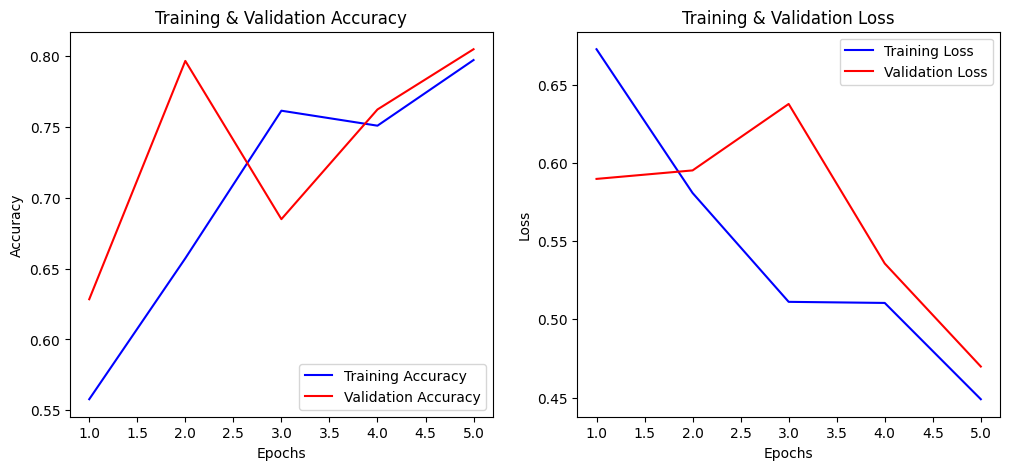

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Load dataset
# Nguyễn Việt Quang B22DCCN650
df = pd.read_csv("DATA/IMDB-Dataset.csv")

reviews = df["review"].astype(str).values
labels = df["sentiment"].map({"positive": 1, "negative": 0}).values

# 2. Train/test split
# Nguyễn Việt Quang B22DCCN650
X_train, X_test, y_train, y_test = train_test_split(
    reviews, labels, test_size=0.2, random_state=42
)

# 3. Tokenizer + Text to sequences
# Nguyễn Việt Quang B22DCCN650
vocab_size = 20000   # số lượng từ tối đa
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# 4. Padding
# Nguyễn Việt Quang B22DCCN650
max_len = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post") # số 0 được thêm ở cuối
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post")

# 5. Build model — chọn LSTM hoặc GRU
# Nguyễn Việt Quang B22DCCN650
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len), #input [batch_size, max_len] → output [batch_size, max_len, 128].

    # Chọn 1 trong 2:
    LSTM(128, return_sequences=False), # chỉ output hidden state cuối cùng, không trả về cả sequence.
    # GRU(128, return_sequences=False),

    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# 6. Train model
# Nguyễn Việt Quang B22DCCN650
history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64
)

# 7. Evaluate
# Nguyễn Việt Quang B22DCCN650
loss, acc = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", acc)

import matplotlib.pyplot as plt

# Nguyễn Việt Quang B22DCCN650
# Lấy lịch sử huấn luyện
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Vẽ accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Vẽ loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



d:\school\se1_year4\IntSys\tieu_luan\code\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 172s 336ms/step - accuracy: 0.5180 - loss: 0.6909 - val_accuracy: 0.5264 - val_loss: 0.6786
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 208s 416ms/step - accuracy: 0.5524 - loss: 0.6585 - val_accuracy: 0.7059 - val_loss: 0.6538
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 244s 378ms/step - accuracy: 0.8429 - loss: 0.3904 - val_accuracy: 0.8669 - val_loss: 0.3354
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 180s 360ms/step - accuracy: 0.9170 - loss: 0.2333 - val_accuracy: 0.8759 - val_loss: 0.3198
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 202s 360ms/step - accuracy: 0.9532 - loss: 0.1443 - val_accuracy: 0.8709 - val_loss: 0.3549
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 86ms/step - accuracy: 0.8757 - loss: 0.3291
Test Accuracy: 0.8756999969482422


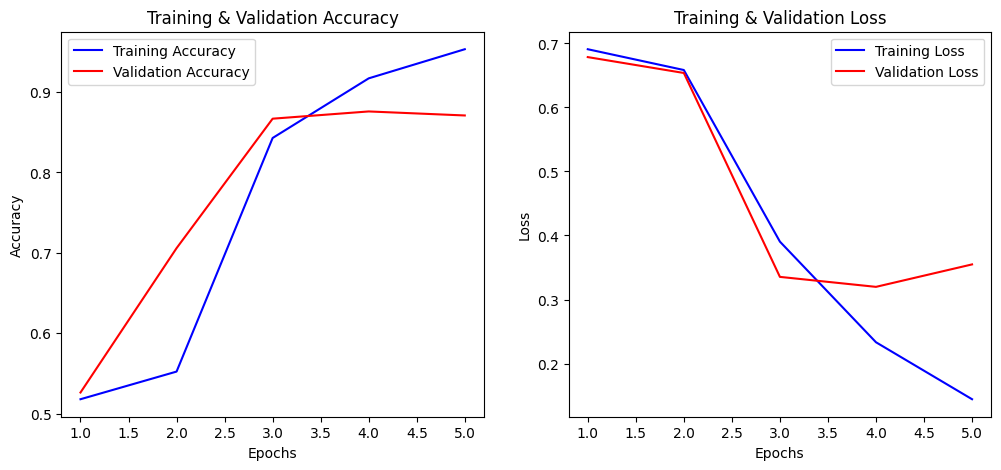

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# =========================
# 1. Load dataset
# =========================
df = pd.read_csv("DATA/IMDB-Dataset.csv")

reviews = df["review"].astype(str).values
labels = df["sentiment"].map({"positive": 1, "negative": 0}).values

# =========================
# (NEW) Stopwords removal
# =========================
import nltk
from nltk.corpus import stopwords
import re

# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

reviews_clean = [clean_text(r) for r in reviews]

# =========================
# 2. Train/test split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    reviews_clean, labels, test_size=0.2, random_state=42
)

# =========================
# 3. Tokenizer
# =========================
vocab_size = 20000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# =========================
# 4. Padding
# =========================
max_len = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post")

# =========================
# 5. Build model
# =========================
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(1e-3), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

# =========================
# 6. Train model
# =========================
history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64
)

# =========================
# 7. Evaluate
# =========================
loss, acc = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", acc)

# =========================
# Plot accuracy + loss
# =========================
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend()

plt.show()
